In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass//glass.data',header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
column_names = ["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
df.columns=column_names

In [5]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [7]:
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df = df.drop('Id', axis=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result    

In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
label = df['Type']
del df['Type']

In [12]:
df = normalize(df)

In [13]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


In [14]:
df['Type'] = label
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,1
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,1
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0,1
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0,1
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [16]:
label = df['Type']
del df['Type']

In [17]:
df.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.0,0.252336,0.351786,0.009662,0.30855,0.0,0.0


<AxesSubplot:>

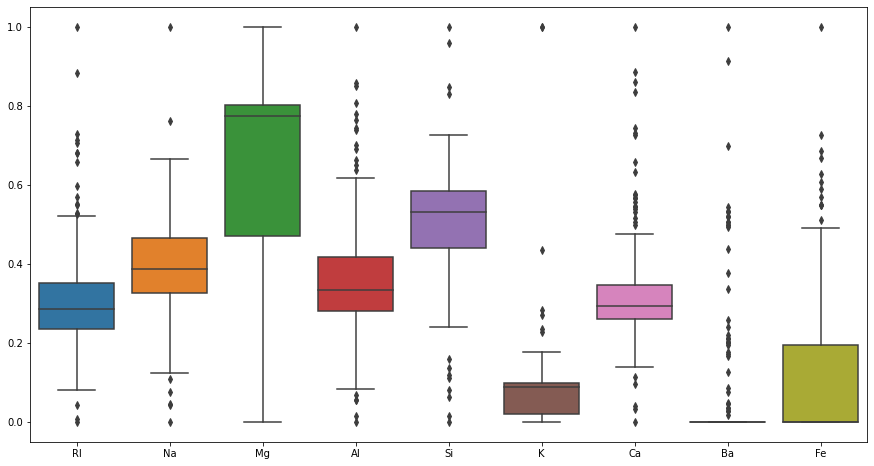

In [18]:
fig = plt.figure(figsize=(15,8))
sb.boxplot(data=df)

In [19]:
y = label
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [20]:
y = label
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

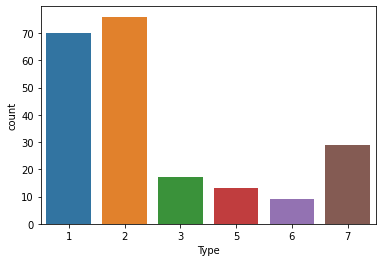

In [21]:
sb.countplot(x=y)
plt.show()

In [22]:
df['Type'] = label

In [23]:
df.head(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.0,0.252336,0.351786,0.009662,0.30855,0.0,0.0,1


In [24]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [25]:
len(df)

194

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [27]:
y = df['Type']
del df['Type']

In [28]:
x = df

In [29]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 324)

In [30]:
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
25,0.284899,0.338346,0.788419,0.286604,0.569643,0.104670,0.288104,0.000000,0.000000
26,0.297629,0.372932,0.775056,0.348910,0.505357,0.095008,0.278810,0.000000,0.000000
138,0.245391,0.309774,0.783964,0.389408,0.633929,0.106280,0.229554,0.000000,0.000000
64,0.464004,0.413534,0.832962,0.190031,0.392857,0.028986,0.388476,0.000000,0.137255
141,0.323090,0.371429,0.808463,0.242991,0.539286,0.091787,0.276952,0.028571,0.333333


In [31]:
X_train.shape

(145, 9)

In [32]:
y_train.shape

(145,)

In [33]:
y_train.head()

25     1
26     1
138    2
64     1
141    2
Name: Type, dtype: int64

# KNeighbours Classifier

In [34]:
accuracy = []

In [35]:
knn_ac = []
k_value=range(1,10)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [37]:
knn = KNeighborsClassifier(n_neighbors=2,p=2,metric='minkowski',weights='distance')
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)
a = accuracy_score(y_true = y_test, y_pred = predictions)*100

accuracy.append(a)

In [38]:
for i in k_value:
    a=[]
    
    knn=KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski',weights='distance')
    knn.fit(X_train,y_train)
    predictions=knn.predict(X_test)
    a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)
    
    knn_ac.append(a)

Text(0.5, 1.0, 'Accuracy vs k_value')

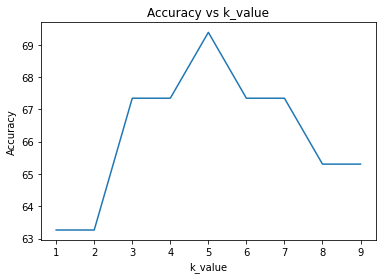

In [39]:
plt.plot(k_value,knn_ac)
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k_value')

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
a = []

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

77.55102040816327

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression 

In [43]:
a = []

lgc = LogisticRegression(max_iter = 100)
lgc.fit(x,y)
predictions=lgc.predict(X_test)
a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

65.3061224489796

# Naive Bayes Classifier (Bernoulli)

In [44]:
from sklearn.naive_bayes import BernoulliNB

In [45]:
a = []

bnb = BernoulliNB()
bnb.fit(x,y)
predictions = bnb.predict(X_test)
a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

53.06122448979592

# Naive Bayes Classifier (Gaussian)

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
a = []

gnb = GaussianNB()
gnb.fit(x,y)
predictions = gnb.predict(X_test)
a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

77.55102040816327

# SVM Classifier

In [48]:
from sklearn import svm
from sklearn.svm import SVC

In [49]:
svclassifier = SVC(kernel = 'linear')

svclassifier.fit(x,y)
predictions = svclassifier.predict(X_test)
a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

65.3061224489796

# Ensemble Voting Classifier

In [50]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [51]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators = 50, random_state = 1)
clf3 = GaussianNB()
clf4 = SVC(kernel = 'linear', probability = True)

eclf = VotingClassifier(estimators=[('lr',clf1), ('rf',clf2), ('gnb',clf3), ('svc', clf4)], voting = 'soft', weights = [2,5,1,1])

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Support Vector', 'Ensemble']):
    scores = cross_val_score(clf, x, y, cv = 10, scoring = 'accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std(), label))

e:\python directory\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
e:\python directory\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 64.97 (+/- 0.08) [Logistic Regression]
Accuracy: 72.18 (+/- 0.12) [Random Forest]
Accuracy: 54.55 (+/- 0.15) [Naive Bayes]
Accuracy: 55.18 (+/- 0.11) [Support Vector]


e:\python directory\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
e:\python directory\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
e:\python directory\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 72.68 (+/- 0.10) [Ensemble]


In [52]:
accuracy.append(77)
accuracy.append(71.77)

In [53]:
accuracy

[63.26530612244898,
 77.55102040816327,
 65.3061224489796,
 53.06122448979592,
 77.55102040816327,
 65.3061224489796,
 77,
 71.77]

In [54]:
method = ['knn','RandomForestClassifier','LogisticRegression','Bernoulli Naive Bayes', 'Gaussian Naive Bayes', 'SVM Classifier', 'Ensemble Voting','Decision Tree']

In [55]:
table = pd.DataFrame(accuracy,method,columns=['Accuracy'])

In [56]:
table

,Accuracy
knn,63.265306
RandomForestClassifier,77.551020
LogisticRegression,65.306122
Bernoulli Naive Bayes,53.061224
Gaussian Naive Bayes,77.551020
SVM Classifier,65.306122
Ensemble Voting,77.000000
Decision Tree,71.770000


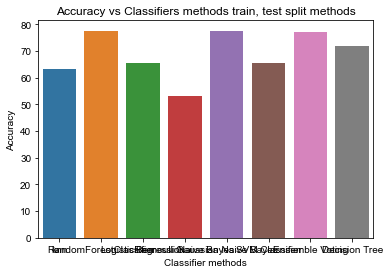

In [57]:
sb.barplot(x=method,y=accuracy,data=table)
plt.xlabel('Classifier methods')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Classifiers methods train, test split methods')
sb.set(rc={'figure.figsize':(20,20)})

# k fold cross validation

In [58]:
from sklearn.linear_model import LogisticRegression 

In [59]:
lgc = LogisticRegression()

In [60]:
lgc.fit(X_train,y_train)

LogisticRegression()

In [61]:
predictions=lgc.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predictions)*100

61.224489795918366

In [62]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
accuracy_score(y_true = y_test, y_pred = y_pred_random_forest)*100

77.55102040816327

In [63]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)

In [64]:
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [65]:
methods = ['knn','rfc','lgr','bnb','gng','svc','voting','dt']

In [66]:
accuracy = []

In [67]:
knn_ac = []
k_value = range(1,10)

In [68]:
for i in k_value:
    a = []
    for train_index, test_index in kf.split(x,y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        knn=KNeighborsClassifier(n_neighbors=i,p=2,metric='minkowski',weights='distance')
        knn.fit(X_train,y_train)
        predictions=knn.predict(X_test)
        a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)
    
    knn_ac.append(np.mean(a))
accuracy.append(np.mean(a))
np.mean(a)

44.18421052631579

In [69]:
knn_ac

[43.5,
 43.5,
 45.39473684210526,
 43.815789473684205,
 45.315789473684205,
 44.763157894736835,
 45.263157894736835,
 45.263157894736835,
 44.18421052631579]

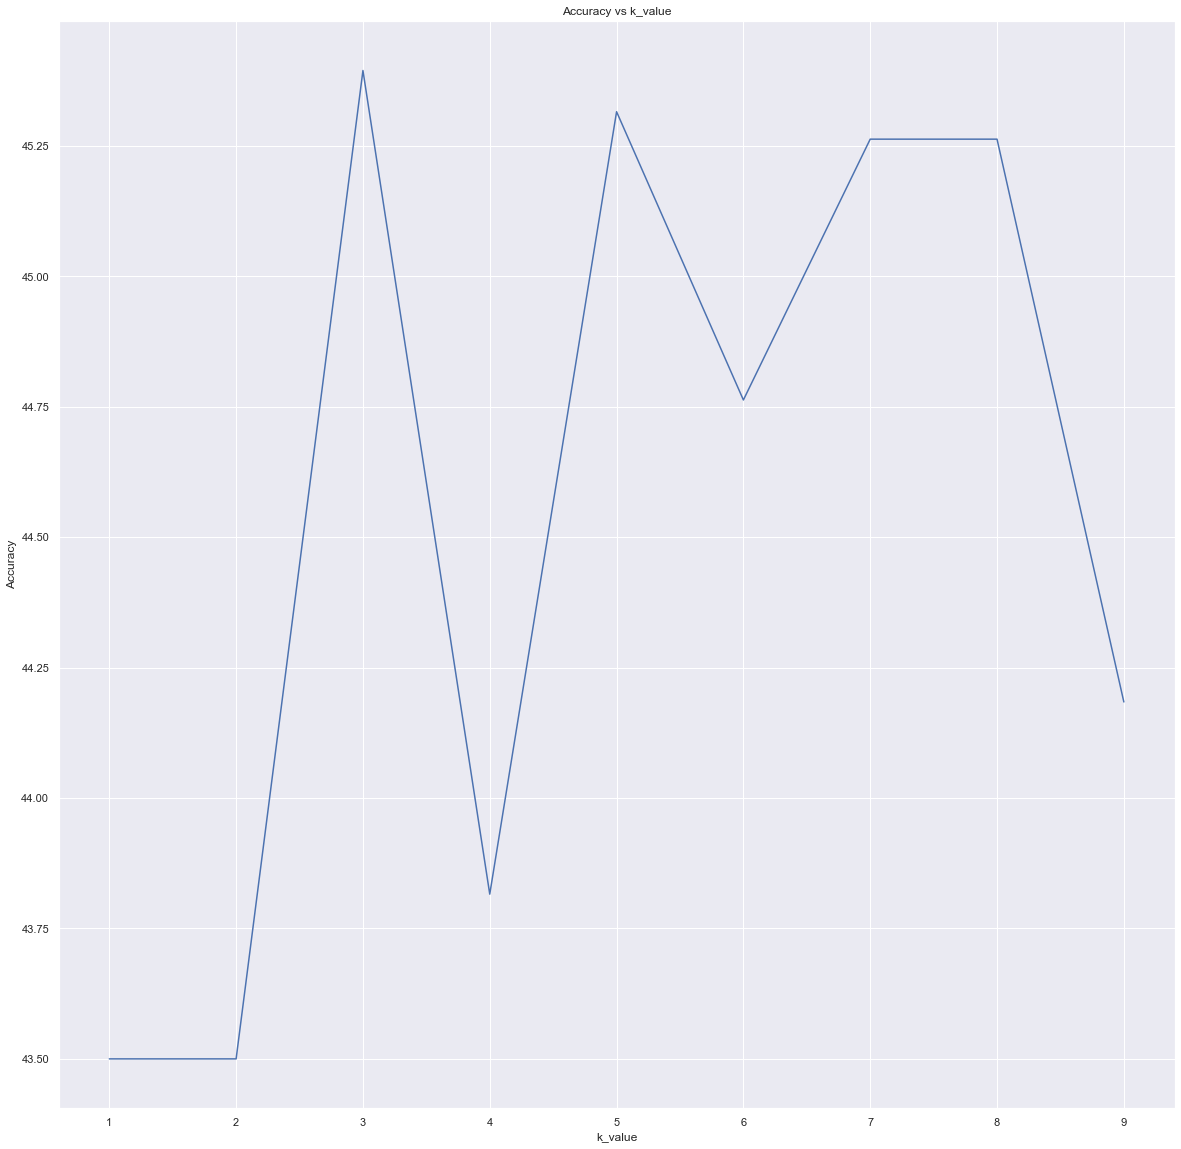

In [70]:
plt.plot(k_value,knn_ac)
plt.xlabel('k_value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k_value')
sb.set(rc={'figure.figsize':(5,4)})

In [71]:
a = []

for train_index, test_index in kf.split(x,y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf = RandomForestClassifier(n_estimators=100)
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

52.86842105263158

In [72]:
a = []

for train_index, test_index in kf.split(x,y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        lgc = LogisticRegression(max_iter=100)
        lgc.fit(x,y)
        predictions = lgc.predict(X_test)
        a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

66.65789473684211

In [73]:
a = []

for train_index, test_index in kf.split(x,y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        bnb.fit(x,y)
        predictions = bnb.predict(X_test)
        a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

53.55263157894736

In [74]:
a = []

for train_index, test_index in kf.split(x,y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        gnb.fit(x,y)
        predictions = gnb.predict(X_test)
        a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

68.84210526315789

In [75]:
a = []

for train_index, test_index in kf.split(x,y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        svclassifier.fit(x,y)
        predictions = svclassifier.predict(X_test)
        a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

56.94736842105262

 # Decision Tree Classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dtf = DecisionTreeClassifier()

a=[]

for train_index, test_index in kf.split(x,y):
        X_train, X_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        dtf.fit(x,y)
        predictions = dtf.predict(X_test)
        a.append(accuracy_score(y_true = y_test, y_pred = predictions)*100)

accuracy.append(np.mean(a))
np.mean(a)

100.0

In [78]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators = 50, random_state = 1)
clf3 = GaussianNB()
clf4 = SVC(kernel = 'linear', probability = True)

eclf = VotingClassifier(estimators=[('lr',clf1), ('rf',clf2), ('gnb',clf3), ('svc', clf4)], voting = 'soft', weights = [2,5,1,1])

for clf, label in zip([clf1, clf2, clf3, clf4, eclf], ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Support Vector', 'Ensemble']):
    scores = cross_val_score(clf, x, y, cv = 10, scoring = 'accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean()*100, scores.std(), label))

e:\python directory\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
e:\python directory\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 64.97 (+/- 0.08) [Logistic Regression]
Accuracy: 72.18 (+/- 0.12) [Random Forest]
Accuracy: 54.55 (+/- 0.15) [Naive Bayes]
Accuracy: 55.18 (+/- 0.11) [Support Vector]


e:\python directory\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
e:\python directory\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
e:\python directory\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Accuracy: 73.21 (+/- 0.10) [Ensemble]


In [79]:
accuracy

[44.18421052631579,
 52.86842105263158,
 66.65789473684211,
 53.55263157894736,
 68.84210526315789,
 56.94736842105262,
 100.0]

In [80]:
accuracy.append(77)

In [81]:
method = ['knn','RandomForestClassifier','LogisticRegression','Bernoulli Naive Bayes', 'Gaussian Naive Bayes', 'SVM Classifier', 'Decision Tree', 'Ensemble Voting']

In [82]:
table = pd.DataFrame(accuracy,method,columns=['Accuracy'])

In [83]:
table

,Accuracy
knn,44.184211
RandomForestClassifier,52.868421
LogisticRegression,66.657895
Bernoulli Naive Bayes,53.552632
Gaussian Naive Bayes,68.842105
SVM Classifier,56.947368
Decision Tree,100.000000
Ensemble Voting,77.000000


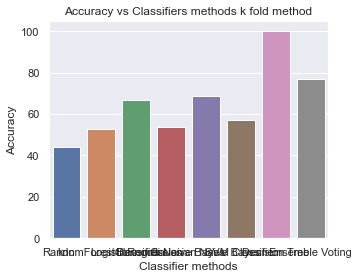

In [84]:
sb.barplot(x=method,y=accuracy,data=table)
plt.xlabel('Classifier methods')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Classifiers methods k fold method')
sb.set(rc={'figure.figsize':(20,20)})